In [277]:

%matplotlib inline
import os
import sys
import string
import numpy as np
import matplotlib.pyplot as plt
#from sympy import *
#from qm import*
import math
#from random import shuffle
import random
import time
import csv

plt.rcParams['figure.figsize'] = (15,5)

import subprocess

In [278]:
temp = open('msfs/bbara.kiss2')
line_char = temp.readlines()
#print(line_char)

l = []
entrada = []
lista_entradas = []
saida = []
lista_saidas = []

estados = []
estados = line_char[4:5]

atual = []
atual_inteiro = []
atual_convertido = []

proximo = []
proximo_inteiro = []
proximo_convertido = []


espaco_aleatorio = []
estados_convertido = int(estados[0].split()[1])

#define o tamanho do espaço de busca basedado no valor entregue pelo arquivo

tamanho_espaco_busca = math.ceil(np.log2(estados_convertido))

entrada_input = int(line_char[1][3:])
saida_output = int(line_char[2][3:])
numero_estados = int(line_char[4][3:])

msf_pronta = []

l = line_char[5:]


for i in range(len(l)):
    entrada = l[i].split()[0]
    lista_entradas.append(entrada)
    
    atual = l[i].split()[1]
    proximo = l[i].split()[2]
    saida = l[i].split()[3]
    lista_saidas.append(saida)
    
    atual_inteiro = int(atual[2:])
    proximo_inteiro = int(proximo[2:])
    atual_convertido.append(bin(atual_inteiro)[2:].zfill(tamanho_espaco_busca))
    #atual_binario = atual_convertido[i]
    proximo_convertido.append(bin(proximo_inteiro)[2:].zfill(tamanho_espaco_busca))
    #proximo_binario = proximo_convertido[i]
    linha = str(lista_entradas[i])+str(atual_convertido[i])+' '+str(proximo_convertido[i])+str(lista_saidas[i])
    msf_pronta.append(linha)
    #print(msf_pronta[i])
    
#msf_pronta.append('.e')
comprimento_input = str(len(lista_entradas[0])+len(atual_convertido[0]))
comprimento_output = str(len(proximo_convertido[0])+len(lista_saidas[0]))
#print(comprimento_input)


def reseta_msf():
    d = open('melhor.pla','w')
    #d.write('\n')
    d.write('.i '+comprimento_input+'\n')
    d.write('.o '+comprimento_output+'\n')
    d.write(line_char[3])

    for i in range(len(msf_pronta)):
        d.write(msf_pronta[i]+'\n')

def reseta_absoluta():
    d = open('melhor_absoluta.pla','w')
    #d.write('\n')
    d.write('.i '+comprimento_input+'\n')
    d.write('.o '+comprimento_output+'\n')
    d.write(line_char[3])

    for i in range(len(msf_pronta)):
        d.write(msf_pronta[i]+'\n')



d = open('melhor_absoluta.pla','w')
#d.write('\n')
d.write('.i '+comprimento_input+'\n')
d.write('.o '+comprimento_output+'\n')
d.write(line_char[3])

for i in range(len(msf_pronta)):
    d.write(msf_pronta[i]+'\n')


#msf_pronta.append('.e'.rstrip())

d.close()


In [279]:
espaco_busca = []
for i in range (2**tamanho_espaco_busca):
        espaco_busca.append(bin(i)[2:].zfill(tamanho_espaco_busca))
        #espaco_aleatorio.append(bin(i)[2:].zfill(tamanho_espaco_busca))

#print(espaco_busca)

##########################  
# Essa funcao é definitiva, ela das três formas é a mais eficiente, 
def novo_shuffle():
    lista_remover = list(espaco_busca)
    nova_atrib = []
    for i in range(numero_estados):
        valor = random.choice(lista_remover)
        lista_remover.remove(valor)
        nova_atrib.append(valor)
    
    return nova_atrib

##### essa funcao faz o que tem que fazer, mas sob o risco de pior caso de 
# executar muitas operaçoes desnecessárias.

#def novo_shuffle():
#    nova_atrib = set()
#    valor = numero_estados
#    while len(nova_atrib) < numero_estados:
#        nova_atrib.add(random.choice(espaco_busca))
#    return nova_atrib


##### funcao descartada ##########

#def cria_nova_msf():
#    #print(tamanho_espaco_busca)
#    espaco_aleatorio = espaco_busca.copy()
#    shuffle(espaco_aleatorio)
#    return set(espaco_aleatorio)

def correspondente(palavra1,palavra2):
    #espaco_aleatorio = list(cria_nova_msf())
    espaco_aleatorio = palavra2
    for i in range(len(espaco_busca)):
        if palavra1 == espaco_busca[i]:
            return str(espaco_aleatorio[i])
        
def nova_maquina():
    novo_atual = []
    novo_proximo = []
    nova_msf = []
    
    #esse trecho faz 5 embaralhamentos da lista para gerar valores aleatorio a cara criacao de uma conjunto de atribuicoes
    
    espaco_aleatorio = list(novo_shuffle())
    
    # percebi que esse trecho estava gerando uma nova lista de atribuicoes a cada chamada de teste de correspondencia
    # creio que isso estava causando um efeito indesejado, uma que vez isso provavelmente estava gerando inconsistencias 
    # que podem estar passando batidas
    # então agora é criada apenas uma lista que é utilizada para a comparacao entre atual e proximos estados da primeira 
    # lista e do novo conjunto de atribuicoes
    
    # aparentemente essa alteração, que pra mim faz sentido, fez cair muito a quantidade de geracao de msf's de tamanho menor que
    # a inicial
    
    for i in range(len(l)):
        #print(atual_convertido[i],proximo_convertido[i])
        novo_atual.append(correspondente(atual_convertido[i],espaco_aleatorio))
        #print("novo atual:",novo_atual[i])
        novo_proximo.append(correspondente(proximo_convertido[i],espaco_aleatorio))
        #print("novo proximo:",novo_proximo[i])
        nova_atrib = str(lista_entradas[i])+str(novo_atual[i])+' '+str(novo_proximo[i])+str(lista_saidas[i])
        nova_msf.append(nova_atrib)
        
    d = open('nova.pla','w')
    #d.write('\n')
    d.write('.i '+comprimento_input+'\n')
    d.write('.o '+comprimento_output+'\n')
    d.write(line_char[3])

    for i in range(len(msf_pronta)):
        d.write(nova_msf[i]+'\n')
    #msf_pronta.append('.e'.rstrip())
    
    d.close()
    
    #return nova_msf

In [280]:
def simplifica_nova_maquina():
    teste = subprocess.run(['./espresso','nova.pla'],stdout=subprocess.PIPE,universal_newlines=True)
    saida = teste.stdout
    a = open('nova.pla','w')
    a.write(saida)
    a.close()
    
def simplifica_melhor_maquina():
    teste = subprocess.run(['./espresso','melhor.pla'],stdout=subprocess.PIPE,universal_newlines=True)
    saida = teste.stdout
    a = open('melhor.pla','w')
    a.write(saida)
    a.close()

def simplifica_melhor_absoluta():
    teste = subprocess.run(['./espresso','melhor_absoluta.pla'],stdout=subprocess.PIPE,universal_newlines=True)
    saida = teste.stdout
    a = open('melhor_absoluta.pla','w')
    a.write(saida)
    a.close()

In [281]:
def leitura_nova_msf():
    nova = open('nova.pla','r')
    line_char = nova.readlines()
    custo_nova = int(line_char[2][3:])
    nova.close()
    return custo_nova

def leitura_melhor_msf():
    melhor = open('melhor.pla','r')
    line_char = melhor.readlines()
    custo_melhor = int(line_char[2][3:])
    melhor.close()
    return custo_melhor

def leitura_melhor_absoluta():
    melhor = open('melhor_absoluta.pla','r')
    line_char = melhor.readlines()
    custo_melhor = int(line_char[2][3:])
    melhor.close()
    return custo_melhor

In [282]:
def troca_maquina():
    nova = open('nova.pla','r')
    melhor = open('melhor.pla','w')
    nova_lista = nova.readlines()
    for i in range(len(nova_lista)):
        melhor.write(str(nova_lista[i]))
        
def troca_maquina_absoluta():
    nova = open('nova.pla','r')
    melhor = open('melhor_absoluta.pla','w')
    nova_lista = nova.readlines()
    for i in range(len(nova_lista)):
        melhor.write(str(nova_lista[i]))

In [283]:
def calculo_custo_nova():
    transicoes_nova = leitura_nova_msf()
    area = transicoes_nova*(2*entrada_input + 3*(np.log2(numero_estados)) + saida_output)
    return area

def calculo_custo_melhor():
    transicoes_melhor = leitura_melhor_msf()
    area = transicoes_melhor*(2*entrada_input + 3*(np.log2(numero_estados)) + saida_output)
    return area

def calculo_custo_absoluta():
    transicoes_melhor = leitura_melhor_absoluta()
    area = transicoes_melhor*(2*entrada_input + 3*(np.log2(numero_estados)) + saida_output)
    return area


In [284]:
def resfriamento_simulado(temperatura):
    reseta_msf()
    temperatura_inicial = temperatura
    temperatura_final = 10
    iteracoes = 0
    simplifica_melhor_maquina()
    custo_melhor = calculo_custo_melhor()
    custo_absoluta = calculo_custo_absoluta()
    historico_temperatura = [temperatura]
    historico = [calculo_custo_melhor()]
    historico_absoluta = [calculo_custo_absoluta()]
    #print("melhor custo",custo_melhor)
    while(temperatura > temperatura_final):
        for i in range(10):
            custo_melhor = calculo_custo_melhor()
            #print(custo_melhor)
            nova_maquina()
            simplifica_nova_maquina()
            custo_nova = calculo_custo_nova()
            #print(custo_nova)
            probabilidade = np.random.random_sample()
            #print(probabilidade)
            #if(custo_nova < custo_absoluta):
            #    troca_maquina_absoluta()
            #    custo_absoluta = custo_nova
            #    historico_absoluta.append(custo_absoluta)
            #    historico_temperatura.append(temperatura)
            if (custo_nova < custo_melhor):
                if (probabilidade < (1+np.exp(-(custo_melhor-custo_nova)/temperatura))**-1):
                    troca_maquina()
                    custo_melhor = custo_nova
                    historico.append(custo_melhor)
                #print("houve troca")
                    historico_temperatura.append(temperatura)
        
        
        #iteracoes = iteracoes+1
        #print(iteracoes)
        #print("T ->",temperatura,"custo->",custo_melhor)
        if temperatura > temperatura_inicial/2:
            temperatura = temperatura - 8
        else:
            temperatura = temperatura - 2
        iteracoes = iteracoes + 1
        
    print("melhor custo",custo_melhor)
    return historico, historico_absoluta, historico_temperatura

In [285]:
temperatura = 1000
historico_temperatura = []
historico_total = []
historico_absoluto = []
reseta_absoluta()
tic = time.perf_counter()

for i in range(1):
    print(i)
    valores, valores_absolutos, temperatura_iter = resfriamento_simulado(temperatura)
    for k in range(len(valores)):
        historico_total.append(valores[k])
        
    for b in range(len(valores_absolutos)):
        historico_absoluto.append(valores_absolutos[b])
    
    for v in range(len(temperatura_iter)):
        historico_temperatura.append(temperatura_iter[v])
        
    print(valores_absolutos)

with open('valores.csv', mode='w', newline='') as resultados:
    writer = csv.writer(resultados)
    for j in range(len(historico_total)):
        writer.writerow([historico_total[j]])

with open('valores_absolutos.csv', mode='w', newline='') as resultados_absolutos:
    writer = csv.writer(resultados_absolutos)
    for a in range(len(historico_absoluto)):
        writer.writerow([historico_absoluto[a]])
        
toc = time.perf_counter()
tempo = str(toc-tic)
with open('tempo_execucao.txt', mode='w', newline='') as time_mes:
    time_mes.write(tempo)
    
print("tempo de execucao:",toc-tic)

0
melhor custo 539.0761756858763
[1197.947057079725]
tempo de execucao: 28.225698712998565


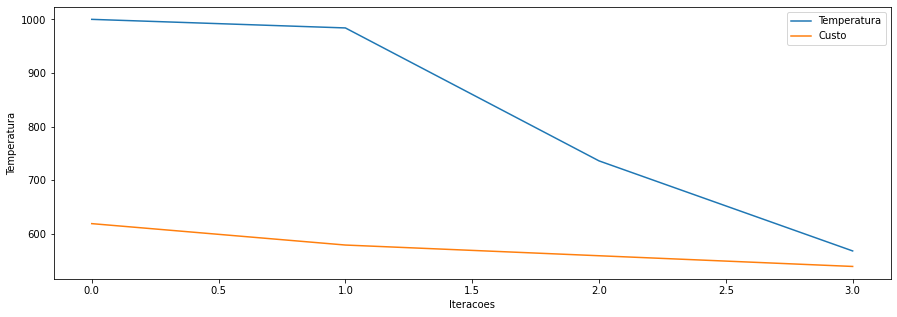

In [286]:

#x = np.linspace(0, 1000,100)
fig, ax = plt.subplots()
ax.plot(historico_temperatura,label='Temperatura')
ax.plot(historico_total,label='Custo')
ax.legend()
ax.set_xlabel('Iteracoes')  # Add an x-label to the axes.
ax.set_ylabel('Temperatura')
fig.savefig('plot1.png')

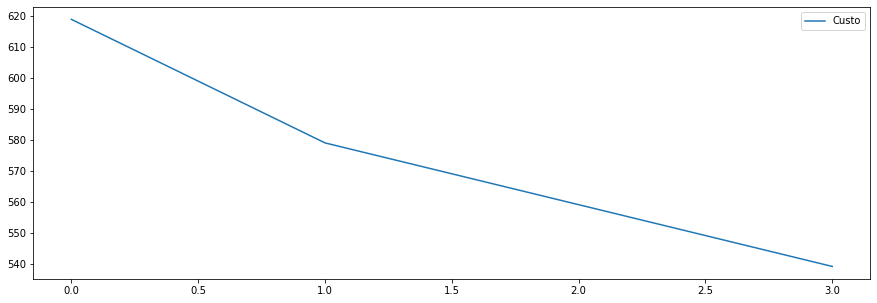

In [287]:
#x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
#ax.plot(x, x, label='linear')
ax.plot(historico_total, label='Custo')
ax.legend()
fig.savefig('plot2.png')